<a href="https://colab.research.google.com/github/EriAparicio/Diplo/blob/main/Grupo_14__IAA_Entregable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [117]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [118]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [119]:
#Visualizamos en un DataFrame el dataset
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target
df_sorted = df.sort_values(by='AveRooms', ascending=False)
df_sorted

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.87500
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.37500
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500
...,...,...,...,...,...,...,...,...,...
17820,1.0938,20.0,1.130435,1.043478,120.0,1.739130,37.37,-121.90,1.87500
14818,1.9107,36.0,1.130435,0.608696,58.0,2.521739,32.68,-117.11,1.25000
3126,2.3750,4.0,1.000000,1.000000,6.0,3.000000,35.21,-117.79,1.37500
8219,4.5938,33.0,0.888889,0.500000,96.0,2.666667,33.79,-118.21,1.12500


In [120]:
df_sorted.describe ()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [121]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [122]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

In [123]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [124]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [125]:
y.shape

(20640,)

In [126]:
y_test.shape

(4128,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**1.1 ¿De qué se trata el conjunto de datos?**

El conjunto de datos esta compuesto por los datos del Censo de 1990 de California donde se proporciona información sobre caracterísitcas habitacionales tanto de las viviendas como del grupo familiar de diferentes bloques (manzanas). Cada fila representa un grupo de bloques o manzanas sensados (un grupo de manzanas es la unidad más pequeña para la que se obtienen datos, suele tener una población entre 600 y 3000 personas).

**1.2 ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**

La variable objetivo que hay que predecir es el valor medio del precio de las casas (expresados en cientos miles de dolares).

**1.3 ¿Qué informacion (atributos) hay disponibles para hacer la prediccion?**

El conjunto de datos dispone de 8 atributos que son utiles para hacer la prediccion, estos son:

- MedInc: ingresos medios en el grupo de bloque
- HouseAge: edad media de la casa en el grupo de bloque
- AveRooms: promedio de habitaciones por hogar
- AveBedrms: promedio de habitaciones por hogar
- Population:grupo de bloque de población
- AveOccup: número promedio de miembros del hogar
- Latitude: latitud del grupo de bloques
- Longitude: longitud del grupo de bloques

**1.4 ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?**

Los atributos que imaginamos seran los más determinantes para la prediccion son: antiguedad de las casas, cantidad promedio de habitaciones y dormitorios, y ubicación dado por las variables de latitud y longitud.

**1.5 ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.**

A priori, se podría pensar que el dataset podría contar con problemas de sesgo si la muestra de viviendas no es representativa de cada grupo de bloques.
También observamos como posible riesgo, que se cuenta con poca información de las características de la ubicación de las viviendas lo que acota el análisis, ya que los precios se ven fuertemente influenciados por esto.

En las variables AveRooms y BedRooms tenemos un sesgo importante ya que estas variables al ser promedios, pueden tomar valores muy altos en bloques de manzanas donde haya pocas viviendas y muchas casas vacias (como complejos vacaciones)

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

**Ejercicio 2.1**

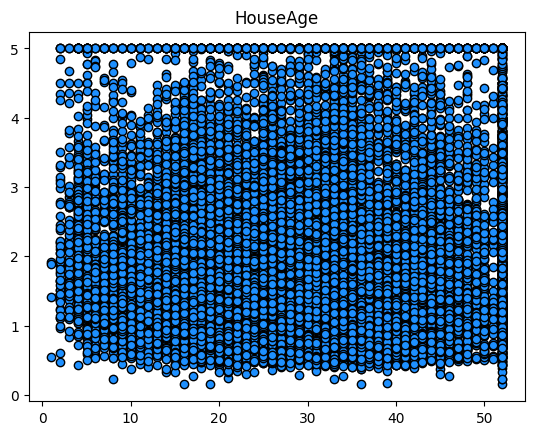

In [127]:
# 1.
feature = 'HouseAge'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'HouseAge')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [128]:
california['feature_names'][1] == feature

True

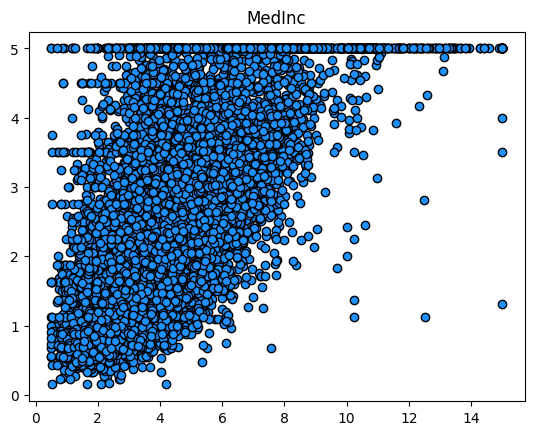

In [129]:
feature = 'MedInc'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'MedInc')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

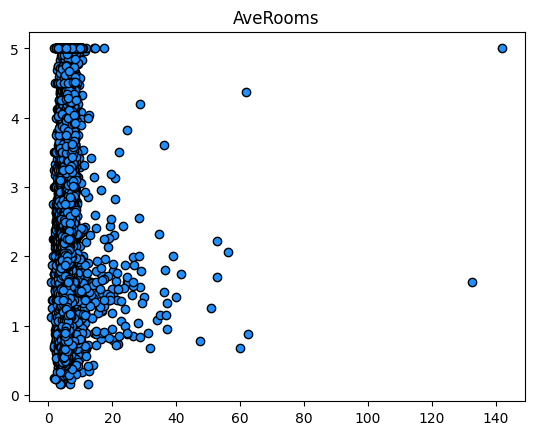

In [130]:
feature = 'AveRooms'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveRooms')
plt.title(feature)
plt.scatter(X[:, selector] , y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.show()

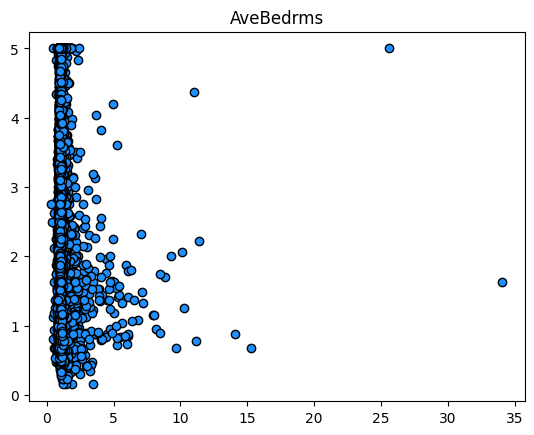

In [131]:
feature = 'AveBedrms'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveBedrms')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

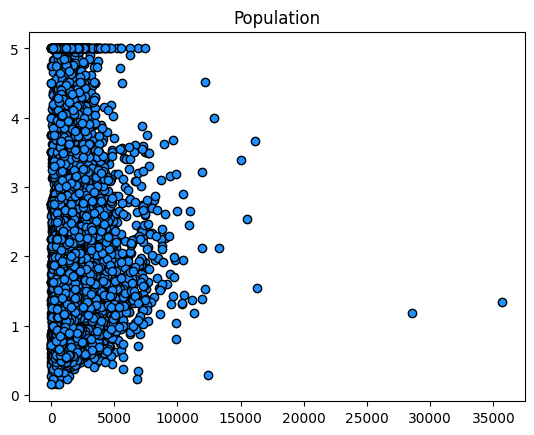

In [132]:
feature = 'Population'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'Population')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

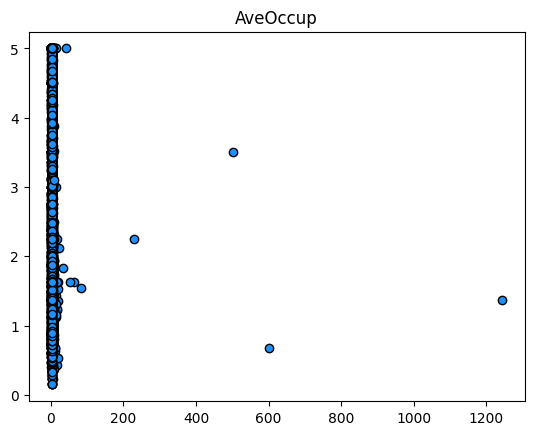

In [133]:
feature = 'AveOccup'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveOccup')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

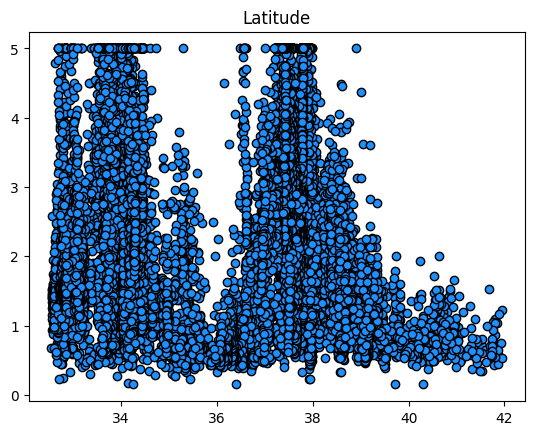

In [134]:
feature = 'Latitude'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'Latitude')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

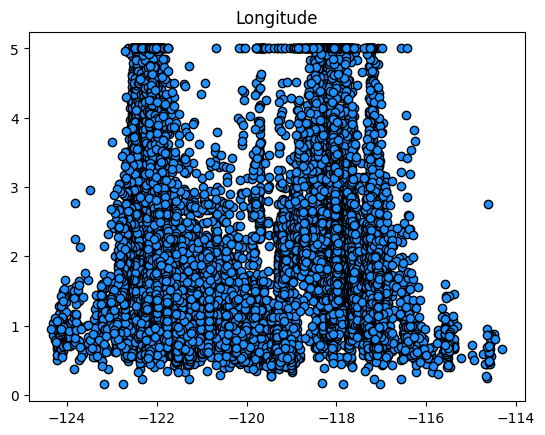

In [135]:
feature = 'Longitude'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'Longitude')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

**Ejercio 2.3**

Los atributos que para nosotros son los mas informativos para la prediccion despues de analizar los grafiscos anteriores son:


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [136]:
# 1. Resolver acá. Ayuda:
feature = 'MedInc'  # selecciono el atributo 'MedInc'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((16512, 1), (4128, 1))

In [137]:
X_train_f[1]

array([4.3898])

In [138]:
from sklearn.linear_model import LinearRegression

# 2. Instanciar y entrenar acá.
regression = LinearRegression()

#Entrenamos el modelo
regression.fit(X_train_f,y_train)

# Obtener los coeficientes de la regresión
coeficientes = regression.coef_
intercepto = regression.intercept_

# Imprimir los coeficientes
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [0.42032178]
Intercepto: 0.4432063522765708


In [139]:
# 3. Predecir y evaluar acá.

y_test_pred = regression.predict(X_test_f)
y_test_pred

array([2.18829831, 2.87249809, 2.27105966, ..., 1.78937091, 3.02549522,
       1.84397071])

In [141]:
y_train_pred = regression.predict(X_train_f)
y_train_pred

array([2.22478224, 2.28833489, 2.096458  , ..., 1.7872693 , 2.81024844,
       1.02669704])

In [142]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 0.696068
Val error: 0.721498


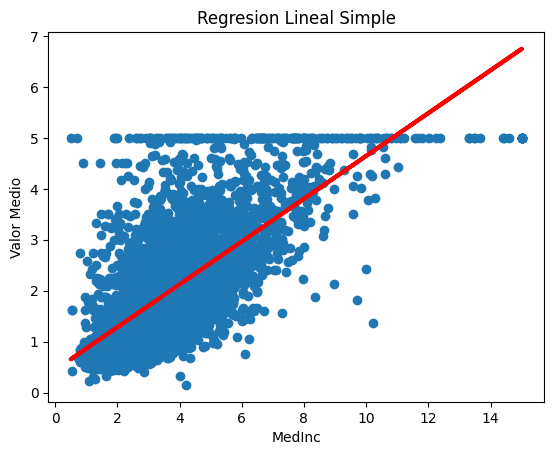

In [148]:
plt.scatter(X_test_f, y_test,)
plt.plot(X_test_f,y_val_pred, color="red", linewidth=3)
plt.title('Regresion Lineal Simple')
plt.xlabel('MedInc')
plt.ylabel('Valor Medio')
plt.show()

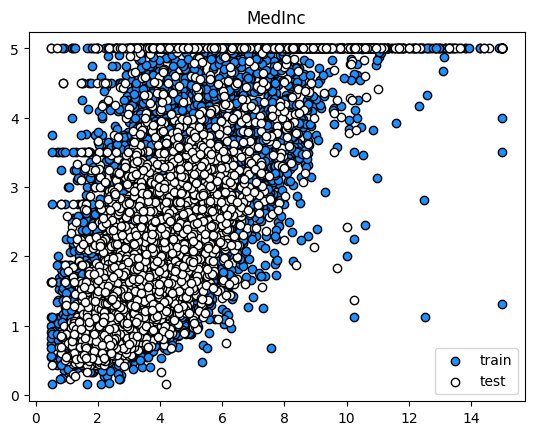

In [144]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.

In [ ]:
# 2. Graficar curvas de error acá.

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'HouseAge') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

In [ ]:
# 2. Resolver acá.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
